In [1]:
import importlib.util
def module_from_file(module_name, file_path): #The code that imports the file which originated the training with all the instructions
            spec = importlib.util.spec_from_file_location(module_name, file_path)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)
            return module

from importlib import import_module
#foo = import_module(fold_folder+'/Funs.py', package=None)


folder = './xforanalogs/NA24by48/Z8/yrs500/interT15fw20.1.20lrs4'
foo = module_from_file("foo", f'{folder}/Funs.py')

import random as rd  
from scipy.stats import norm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.metrics import log_loss

tff = foo.tff # tensorflow routines 
ut = foo.ut # utilities
ln = foo.ln #Learn2_new.py
print("==Checking GPU==")
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

print("==Checking CUDA==")
tf.test.is_built_with_cuda()

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
sys.path.insert(1, '../ERA')

print("==Reading data==")

year_permutation = np.load(f'{folder}/year_permutation.npy')

run_vae_kwargs = ut.json2dict(f"{folder}/config.json")
T = ut.extract_nested(run_vae_kwargs, 'T')
if (ut.keys_exists(run_vae_kwargs, 'label_period_start') and ut.keys_exists(run_vae_kwargs, 'label_period_end')):
    label_period_start = ut.extract_nested(run_vae_kwargs, 'label_period_start')
    label_period_end = ut.extract_nested(run_vae_kwargs, 'label_period_end')
    time_start = ut.extract_nested(run_vae_kwargs, 'time_start')
    time_end = ut.extract_nested(run_vae_kwargs, 'time_end')
    
    
n_days = time_end-time_start-T+1
n_days

import numpy as np
import pickle
folder = './xforanalogs/NA24by48/Z8/yrs500/interT15fw20.1.20lrs4/'
open_file = open(f'{folder}/committor.pkl', "rb")
committor_dictionary = pickle.load(open_file)
open_file.close()
committor = committor_dictionary['committor']
Y = np.load('./xforanalogs/NA24by48/Z8/yrs500/interT15fw20.1.20lrs4/Y.npy')
committor_dictionary.keys()

2022-07-13 12:59:48.843569: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
In this environment you cannot import Basemap
In this environment you cannot import Basemap


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-07-13 12:59:52.326597: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-13 12:59:52.341497: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-13 12:59:52.542772: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-13 12:59:52.542811: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6420node2): /proc/driver/nvidia/version does not exist
2022-07-13 12:59:52.542825: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices 

==Checking GPU==
==Checking CUDA==
==Reading data==


dict_keys(['committor', 'skill', 'RunFolds_kwargs_default'])

# Without Self Analogs

In [2]:
committor_dictionary['RunFolds_kwargs_default']

{'nfield': 0,
 'input_set': 'va',
 'bulk_set': 'tr',
 'RunCheckpoints_kwargs': {'allowselfanalogs': False,
  'RunNeighbors_kwargs': {'num_Traj': 10000,
   'T': 15,
   'chain_step': 3,
   'neighbors': [1, 2, 3, 5, 10, 20, 50, 100],
   'delay': array([0, 1, 2, 3, 4, 5])}}}

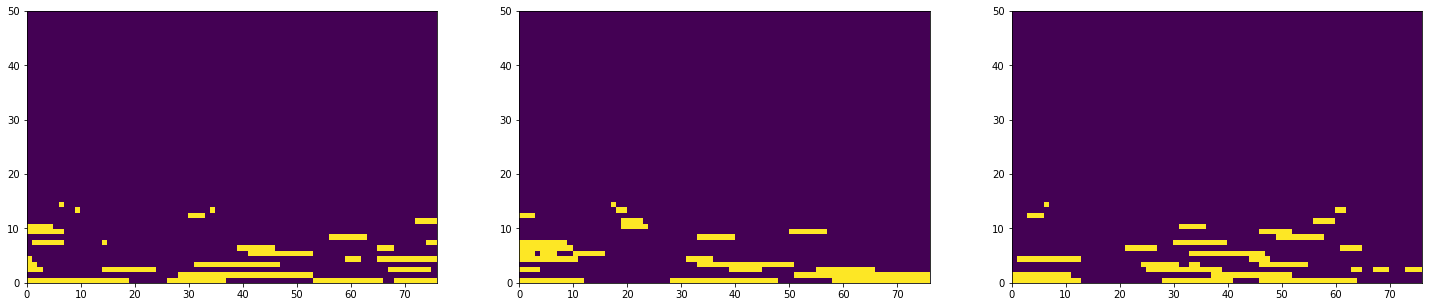

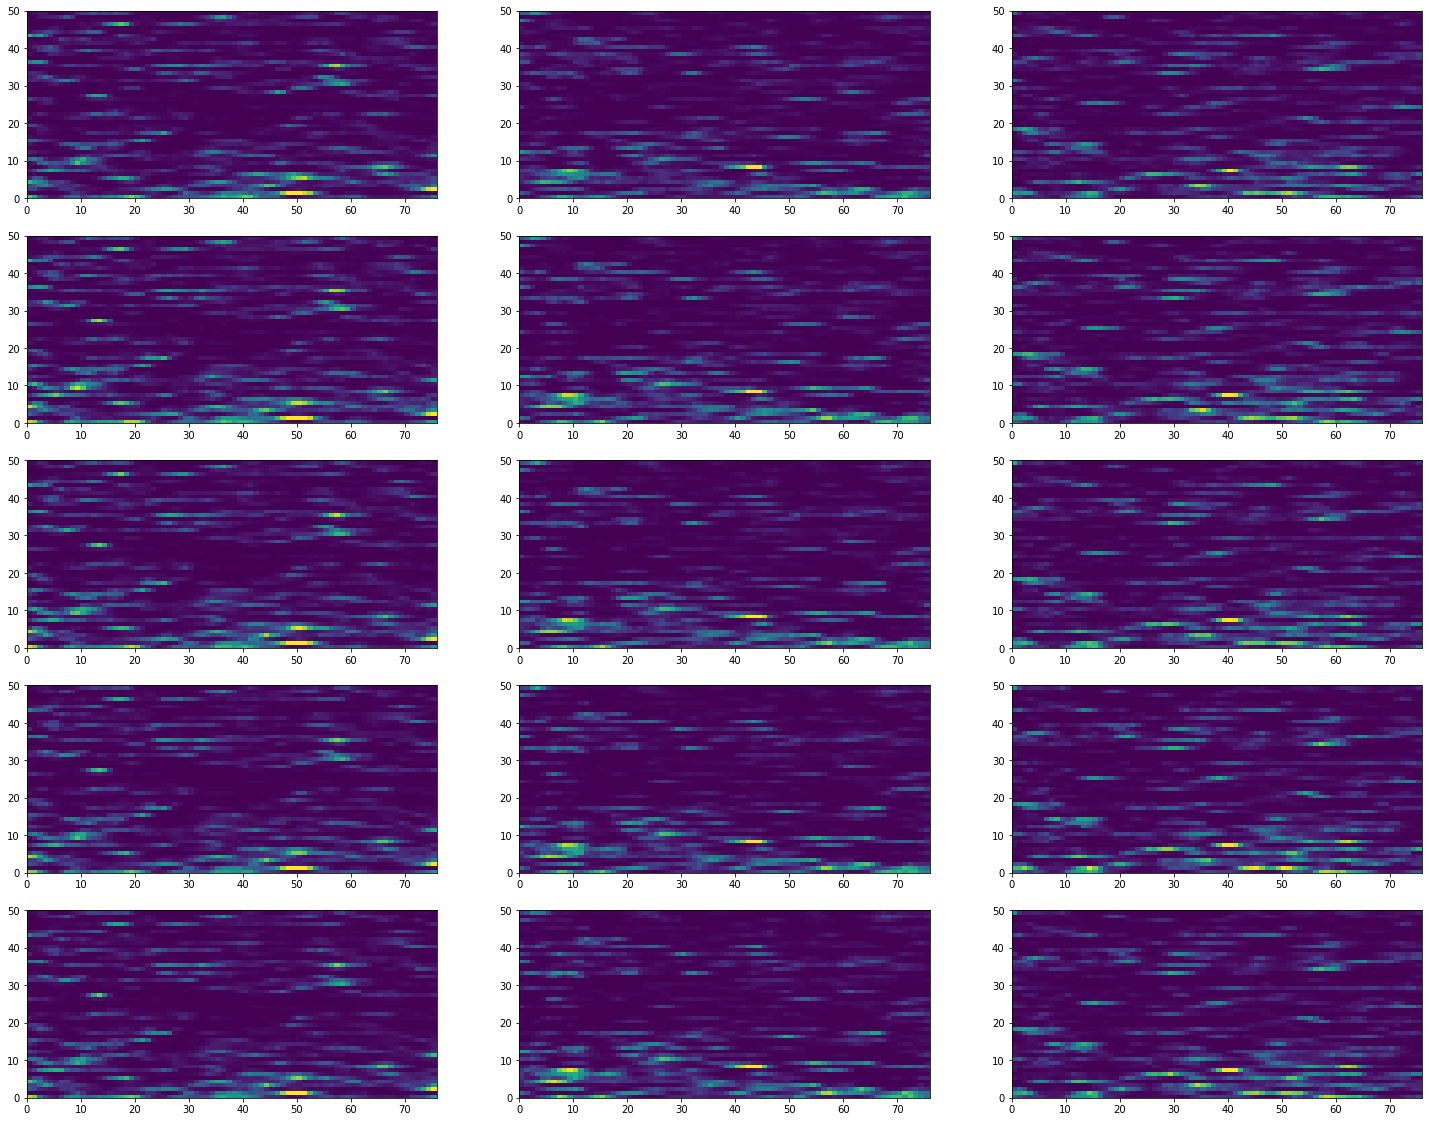

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
for fold in range(3):
        Y_va = np.load(f'{folder}/fold_{fold}/Y_va.npy')
        Y_va = Y_va.reshape(-1,n_days)[:,(label_period_start-time_start):(n_days-T+1)]
        ax = fig.add_subplot(spec[0,fold])
        ax.pcolor(Y_va, vmin=0, vmax=1)

nn = 50
tau = 0
fig2 = plt.figure(figsize=(25, 20))
spec2 = gridspec.GridSpec(ncols=3, nrows=len(list(committor.keys())), figure=fig2)
for i,checkpoint in enumerate(list(committor.keys())):
        for fold in range(3):
                q = committor[checkpoint][nn][fold]
                q = q.reshape(-1,n_days,q.shape[1])[:,(label_period_start-time_start-3*tau):(n_days-T+1-3*tau),tau]
                ax = fig2.add_subplot(spec2[i,fold])
                ax.pcolor(q, vmin=0, vmax=.5)

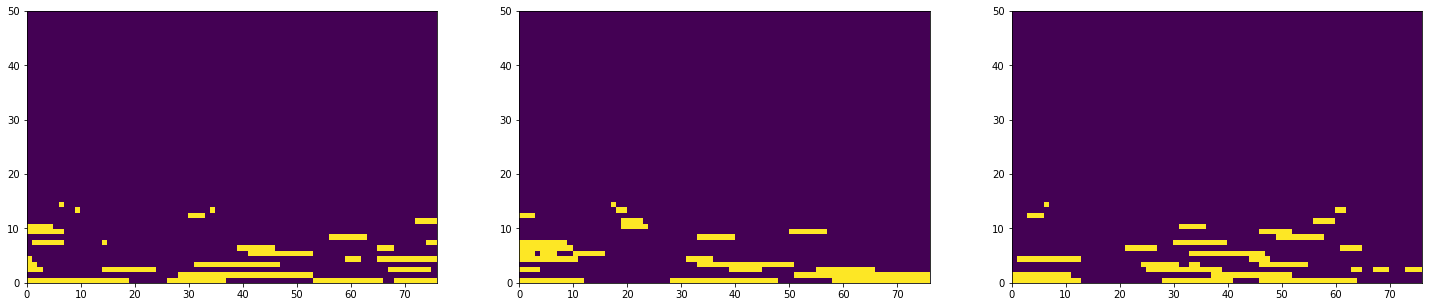

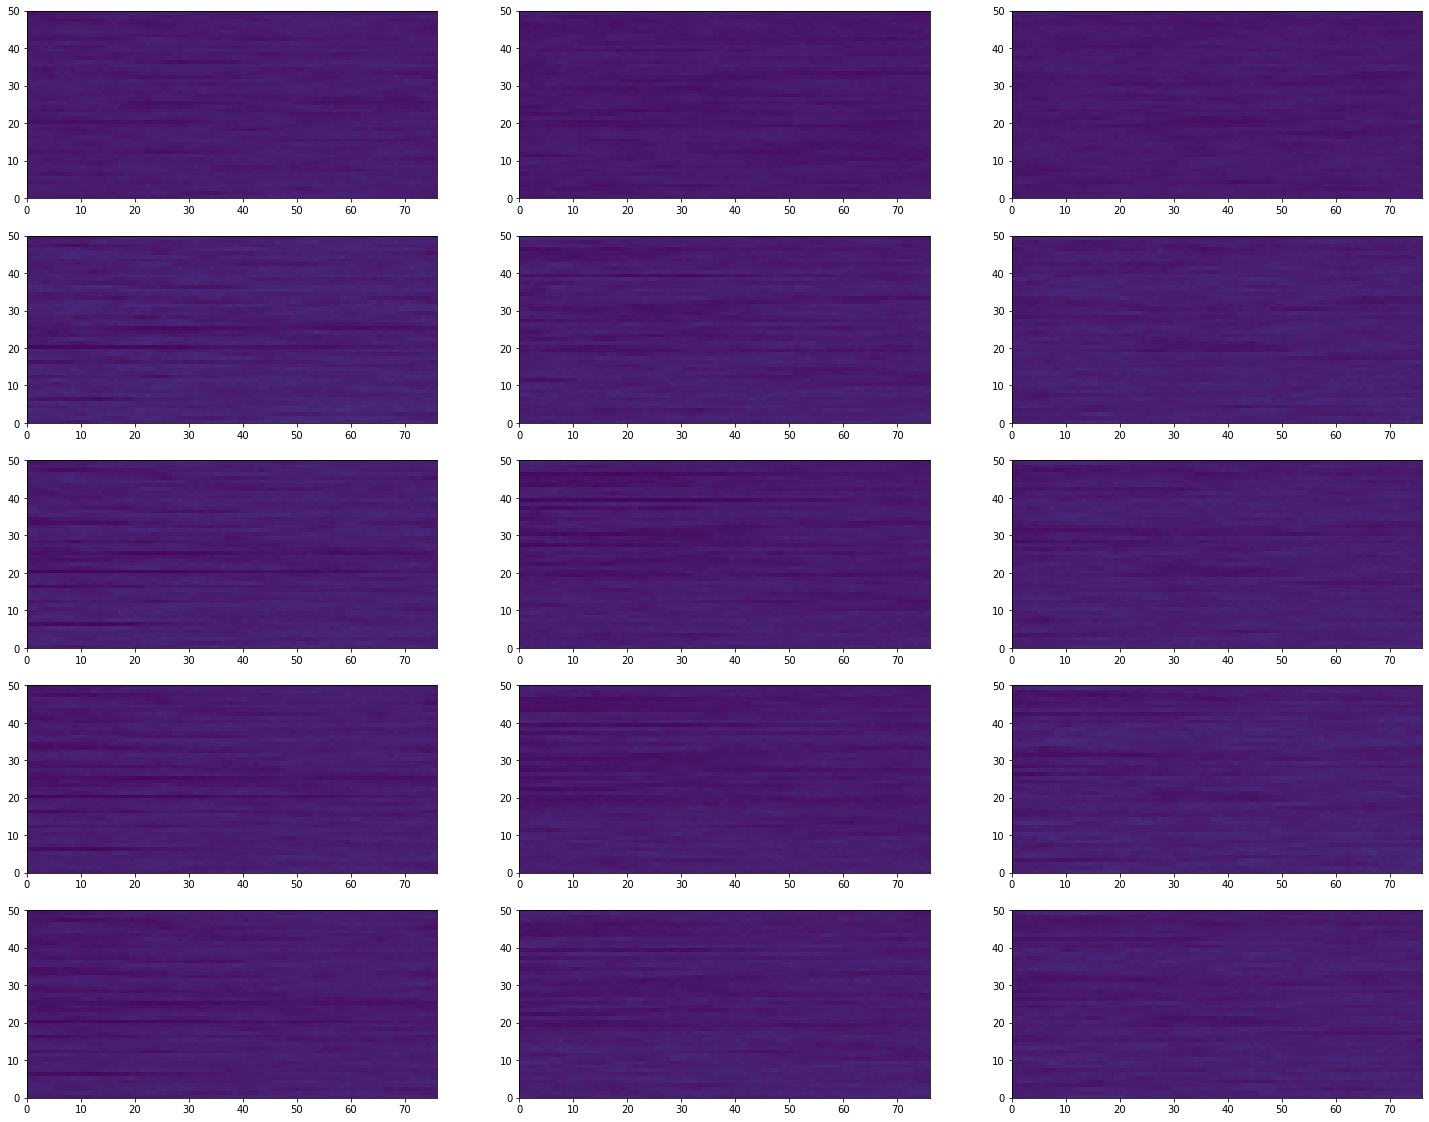

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
for fold in range(3):
        Y_va = np.load(f'{folder}/fold_{fold}/Y_va.npy')
        Y_va = Y_va.reshape(-1,n_days)[:,(label_period_start-time_start):(n_days-T+1)]
        ax = fig.add_subplot(spec[0,fold])
        ax.pcolor(Y_va, vmin=0, vmax=1)

nn = 50
tau = 5
fig2 = plt.figure(figsize=(25, 20))
spec2 = gridspec.GridSpec(ncols=3, nrows=len(list(committor.keys())), figure=fig2)
for i,checkpoint in enumerate(list(committor.keys())):
        for fold in range(3):
                q = committor[checkpoint][nn][fold]
                q = q.reshape(-1,n_days,q.shape[1])[:,(label_period_start-time_start-3*tau):(n_days-T+1-3*tau),tau]
                ax = fig2.add_subplot(spec2[i,fold])
                ax.pcolor(q, vmin=0, vmax=.5)

In [5]:
percent = ut.extract_nested(run_vae_kwargs, 'percent')
skill = dict()
for i in committor[10][20].keys():
    Y_va = (np.load(f"{folder}/fold_{i}/Y_va.npy").reshape(-1,n_days)[:,(label_period_start-time_start):(n_days-T+1)]).reshape(-1)
    for j in committor.keys():
        if j not in skill:
            skill[j] = {}
        for k in committor[10].keys():
            if k not in skill[j]:
                temp2 = dict()
            else:
                temp2 = skill[j][k]
            temp2[i] = []
            for l in range(committor[j][k][i].shape[1]): # loof over the tau dimension
                entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)(Y_va, ((committor[j][k][i][:,l]).reshape(-1,n_days)[:,(label_period_start-time_start-3*l):(n_days-T+1-3*l)]).reshape(-1)).numpy()
                maxskill = -(percent/100.)*np.log(percent/100.)-(1-percent/100.)*np.log(1-percent/100.)
                temp2[i].append((maxskill-entropy)/maxskill)
            skill[j][k] = temp2

2022-07-13 12:59:58.464983: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-13 12:59:58.465346: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [13]:
skill[10][10][9], committor_dictionary['skill'][10][10][9]

([0.3787750557118303,
  0.21321815216355125,
  0.12441893005141053,
  0.07032879082248719,
  0.04345021107031972,
  0.025611625500215007],
 [0.3787750557118303,
  0.21321815216355125,
  0.12441893005141053,
  0.07032879082248719,
  0.04345021107031972,
  0.025611625500215007])

In [11]:
tau = 0
checkpoint = 10
fold = 0
nn = 10
q = committor[checkpoint][nn][fold]
q = q.reshape(-1,n_days,q.shape[1])[:,(label_period_start-time_start -3*tau):(n_days-T+1-3*tau),tau]
q[3,3]

0.3807

This result does not match what I expect from Sample_Trajctories.ipynb and we need to look into this

In [8]:
np.mean(np.array(list(skill[10][5].values())),0), np.std(np.array(list(skill[10][5].values())),0)

(array([0.31600529, 0.17861182, 0.11414625, 0.07588799, 0.05591744,
        0.04128676]),
 array([0.05482284, 0.03635857, 0.02251197, 0.01983214, 0.01765788,
        0.01417708]))

# With Self Analogs

In [16]:
open_file = open(f'{folder}/committor_selfanalogs.pkl', "rb")
committor_dictionary = pickle.load(open_file)
open_file.close()
committor = committor_dictionary['committor']
committor_dictionary['RunFolds_kwargs_default']

{'nfield': 0,
 'input_set': 'va',
 'bulk_set': 'tr',
 'RunCheckpoints_kwargs': {'allowselfanalogs': True,
  'RunNeighbors_kwargs': {'num_Traj': 10000,
   'T': 15,
   'chain_step': 3,
   'neighbors': [1, 2, 3, 5, 10, 20, 50, 100],
   'delay': array([0, 1, 2, 3, 4, 5])}}}

0 190
1 190
2 190
1 0 135.45340000000002
1 1 114.3486
1 2 125.9595
5 0 159.0371
5 1 130.8706
5 2 146.42079999999999
10 0 147.6903
10 1 123.3621
10 2 140.35809999999998
100 0 136.5549
100 1 120.46310000000001
100 2 145.4801
1000 0 130.71359999999999
1000 1 125.4221
1000 2 138.3243


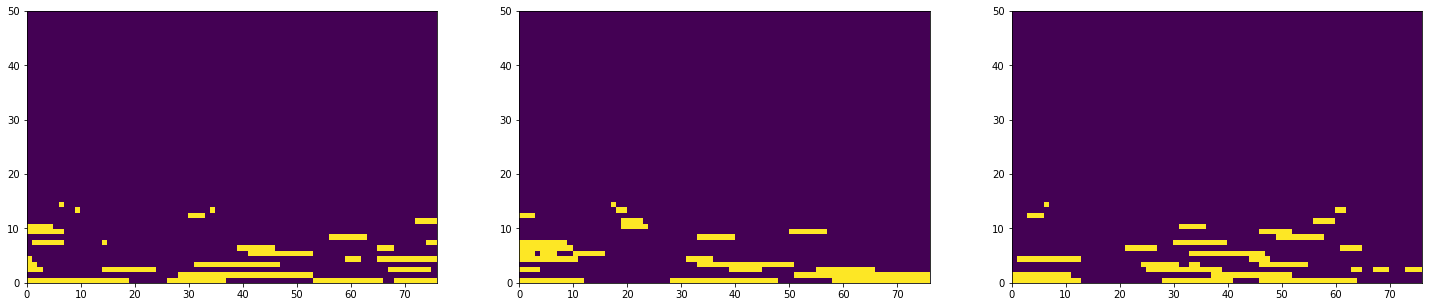

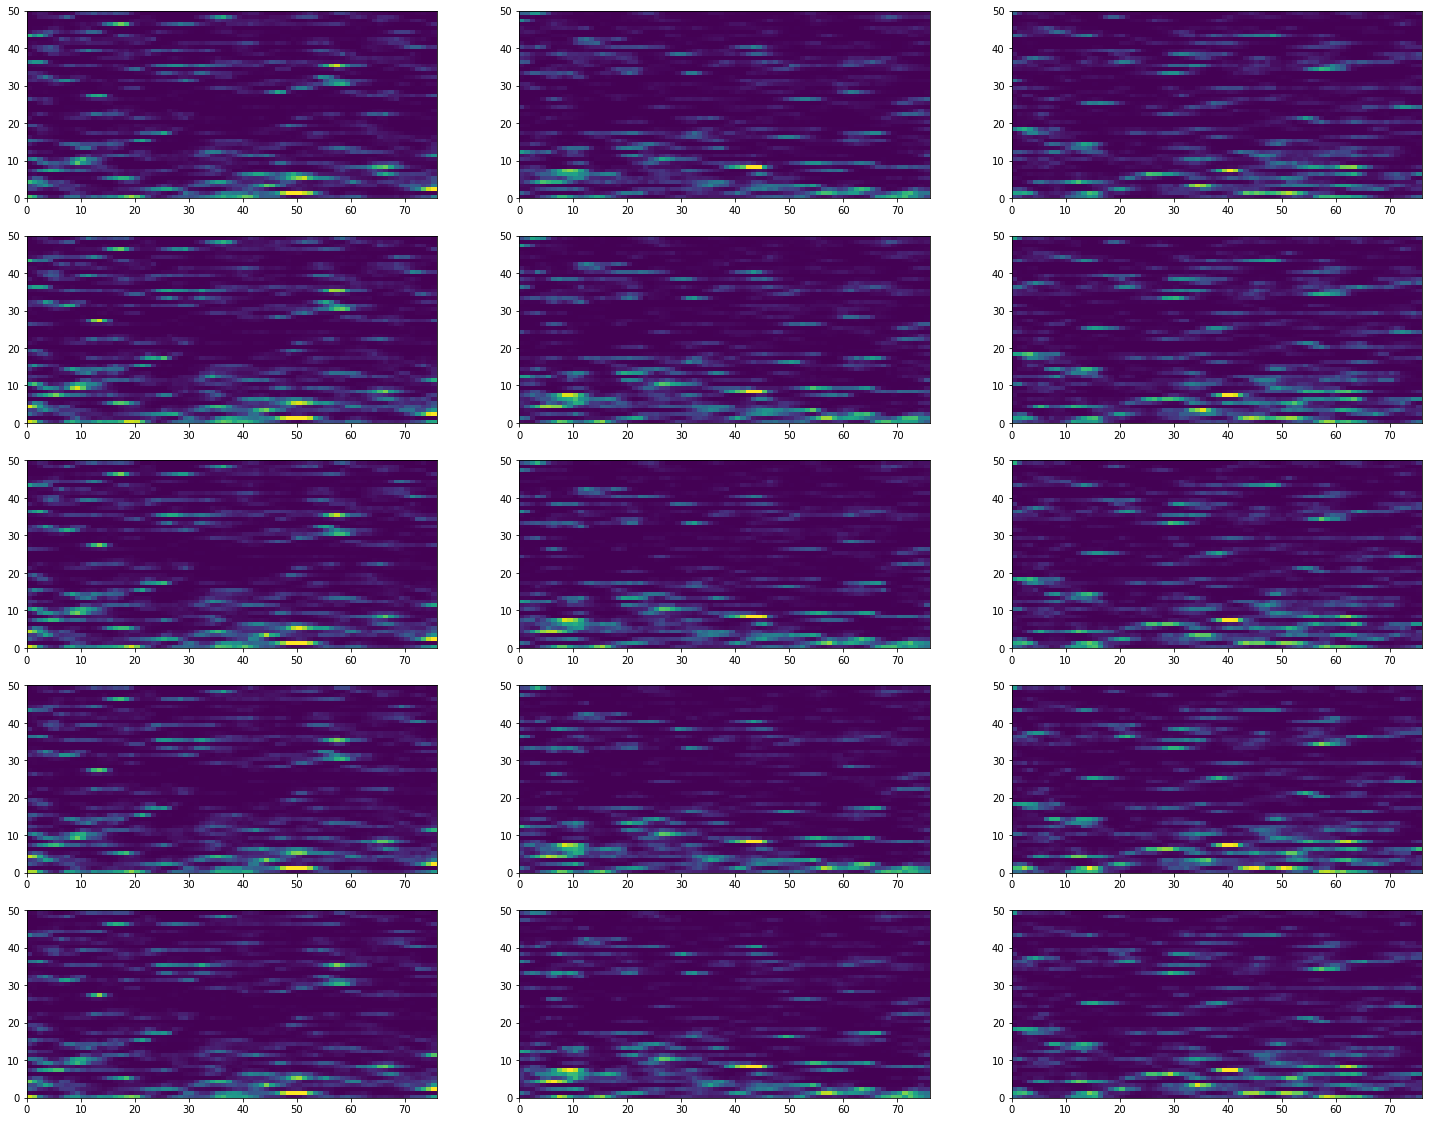

In [44]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
for fold in range(3):
        Y_va = np.load(f'{folder}/fold_{fold}/Y_va.npy')
        Y_va = Y_va.reshape(-1,n_days)[:,(label_period_start-time_start):(n_days-T+1)]
        ax = fig.add_subplot(spec[0,fold])
        ax.pcolor(Y_va, vmin=0, vmax=1)
        print(fold,np.sum(Y_va))

nn = 50
tau = 0
fig2 = plt.figure(figsize=(25, 20))
spec2 = gridspec.GridSpec(ncols=3, nrows=len(list(committor.keys())), figure=fig2)
for i,checkpoint in enumerate(list(committor.keys())):
        for fold in range(3):
                q = committor[checkpoint][nn][fold]
                q = q.reshape(-1,n_days,q.shape[1])[:,(label_period_start-time_start-3*tau):(n_days-T+1-3*tau),tau]
                ax = fig2.add_subplot(spec2[i,fold])
                ax.pcolor(q, vmin=0, vmax=.5)
                print(checkpoint,fold,np.sum(q))

0 190
1 190
2 190
1 0 159.3469
1 1 144.4186
1 2 156.4254
5 0 179.2979
5 1 160.37920000000003
5 2 178.8534
10 0 168.0206
10 1 149.3245
10 2 175.3487
100 0 165.0315
100 1 151.39690000000002
100 2 180.594
1000 0 163.72570000000002
1000 1 157.0217
1000 2 177.60160000000002


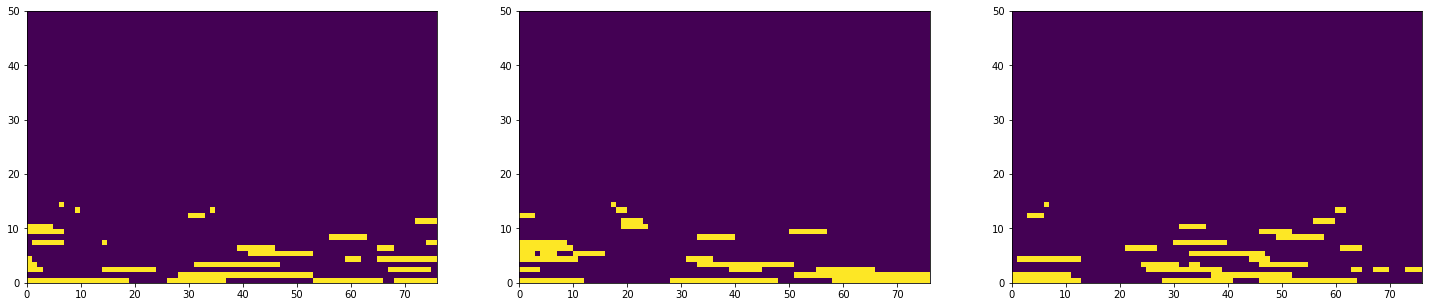

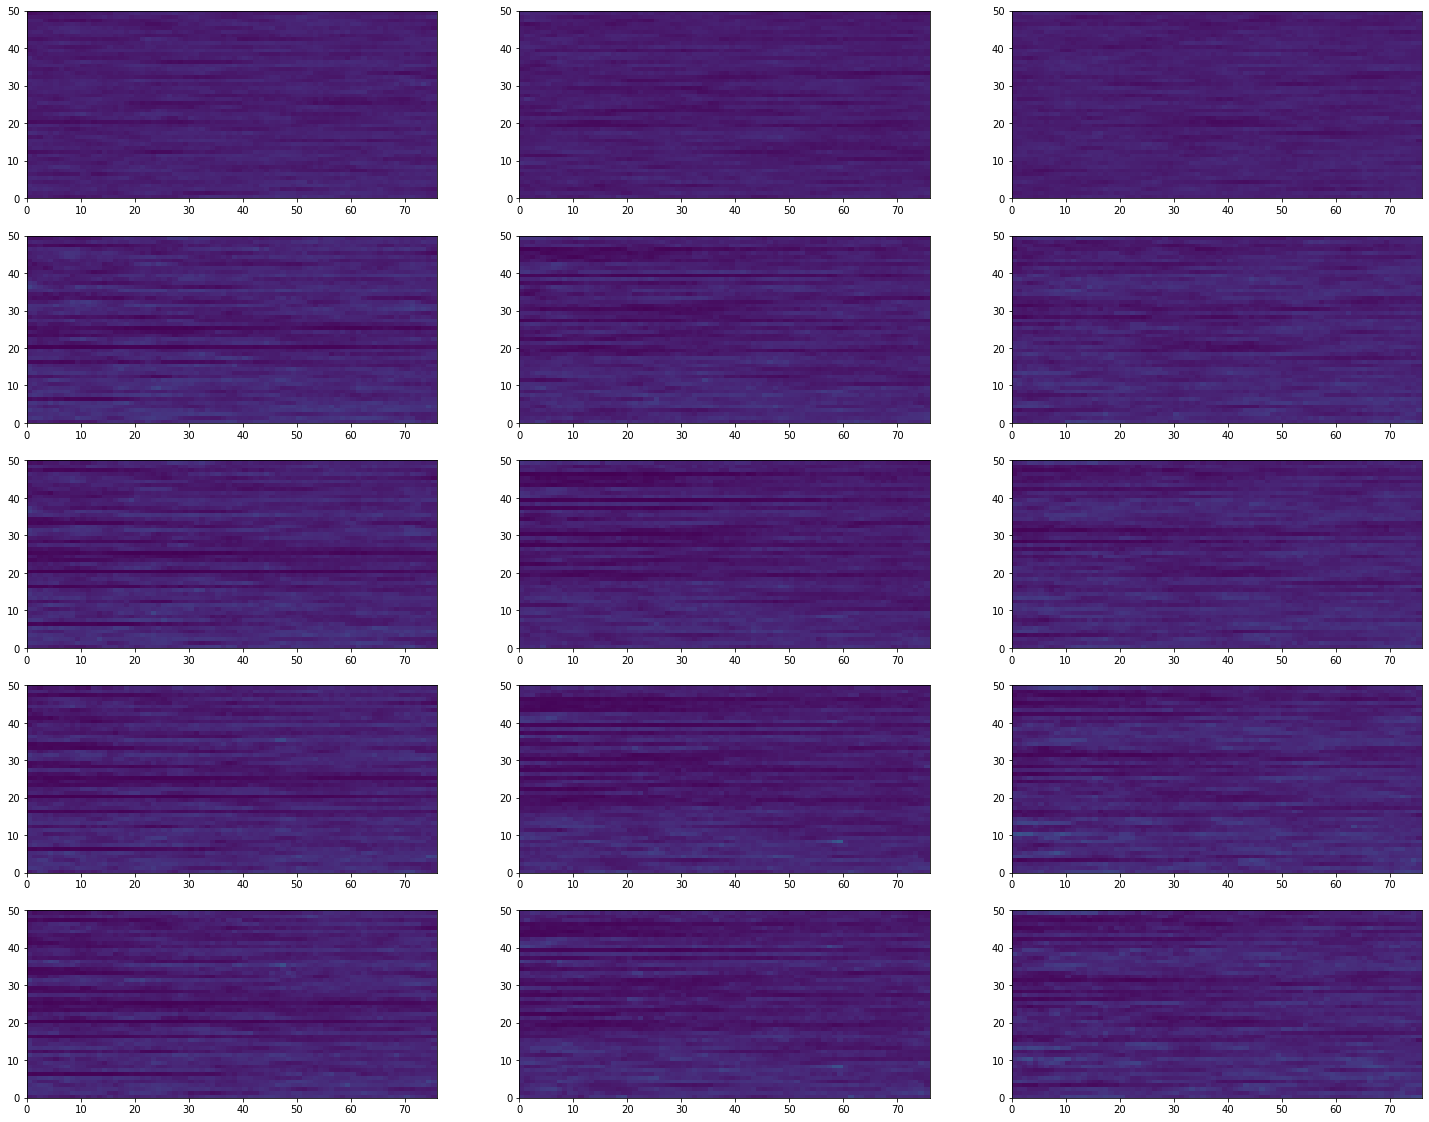

In [45]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
for fold in range(3):
        Y_va = np.load(f'{folder}/fold_{fold}/Y_va.npy')
        Y_va = Y_va.reshape(-1,n_days)[:,(label_period_start-time_start):(n_days-T+1)]
        ax = fig.add_subplot(spec[0,fold])
        ax.pcolor(Y_va, vmin=0, vmax=1)
        print(fold,np.sum(Y_va))
nn = 10
tau = 5
fig2 = plt.figure(figsize=(25, 20))
spec2 = gridspec.GridSpec(ncols=3, nrows=len(list(committor.keys())), figure=fig2)
for i,checkpoint in enumerate(list(committor.keys())):
        for fold in range(3):
                q = committor[checkpoint][nn][fold]
                q = q.reshape(-1,n_days,q.shape[1])[:,(label_period_start-time_start-3*tau):(n_days-T+1-3*tau),tau]
                ax = fig2.add_subplot(spec2[i,fold])
                ax.pcolor(q, vmin=0, vmax=.5)
                print(checkpoint,fold,np.sum(q))

In [20]:
percent = ut.extract_nested(run_vae_kwargs, 'percent')
skill = dict()
for i in committor[10][20].keys():
    Y_va = (np.load(f"{folder}/fold_{i}/Y_va.npy").reshape(-1,n_days)[:,(label_period_start-time_start):(n_days-T+1)]).reshape(-1)
    for j in committor.keys():
        if j not in skill:
            skill[j] = {}
        for k in committor[10].keys():
            if k not in skill[j]:
                temp2 = dict()
            else:
                temp2 = skill[j][k]
            temp2[i] = []
            for l in range(committor[j][k][i].shape[1]): # loof over the tau dimension
                entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)(Y_va, ((committor[j][k][i][:,l]).reshape(-1,n_days)[:,(label_period_start-time_start-3*l):(n_days-T+1-3*l)]).reshape(-1)).numpy()
                maxskill = -(percent/100.)*np.log(percent/100.)-(1-percent/100.)*np.log(1-percent/100.)
                temp2[i].append((maxskill-entropy)/maxskill)
            skill[j][k] = temp2
np.mean(np.array(list(skill[10][5].values())),0), np.std(np.array(list(skill[10][5].values())),0)

(array([0.32999583, 0.20608343, 0.14682847, 0.11053777, 0.09112828,
        0.07561977]),
 array([0.06001173, 0.0403909 , 0.02719496, 0.02783311, 0.02682712,
        0.02185992]))

In [37]:
np.mean(np.array(list(committor_dictionary['skill'][10][5].values())),0), np.std(np.array(list(committor_dictionary['skill'][10][5].values())),0)

(array([0.32999583, 0.20608343, 0.14682847, 0.11053777, 0.09112828,
        0.07561977]),
 array([0.06001173, 0.0403909 , 0.02719496, 0.02783311, 0.02682712,
        0.02185992]))

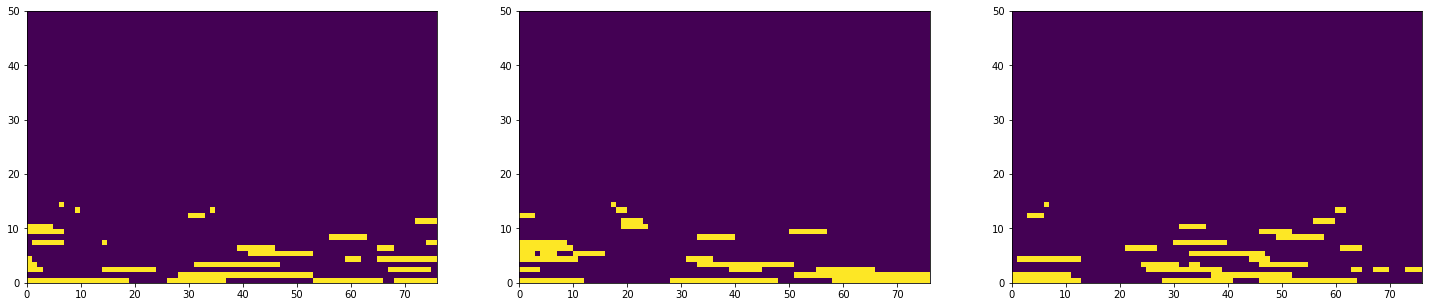

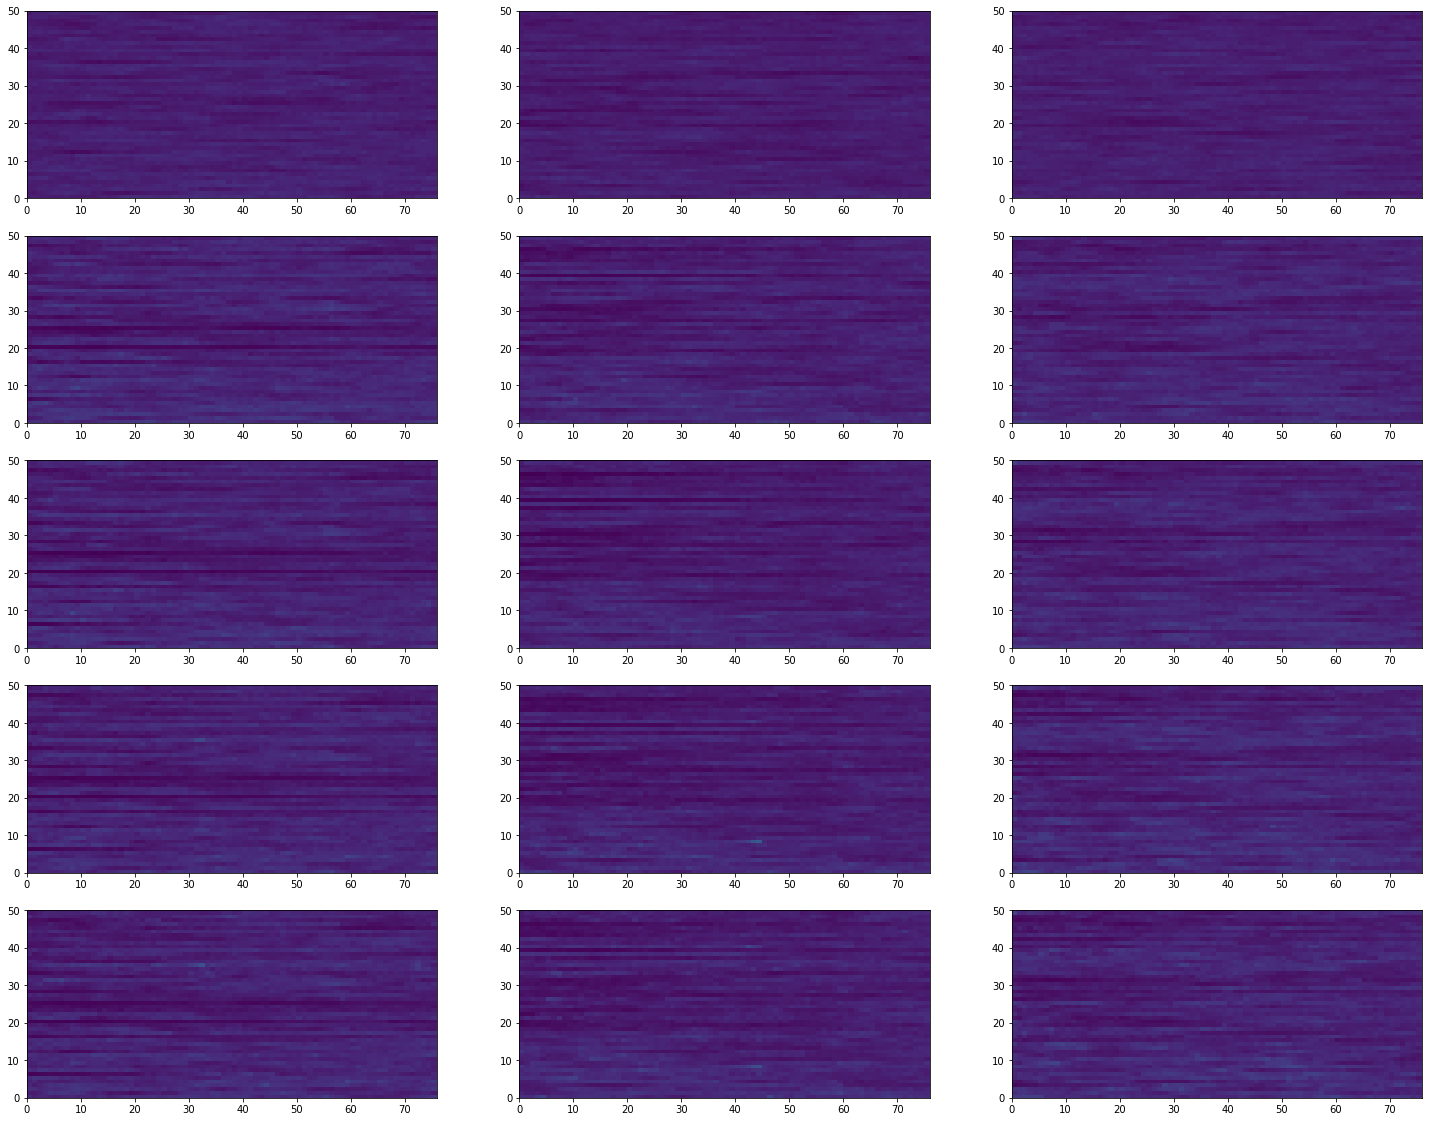

In [40]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
for fold in range(3):
        Y_va = np.load(f'{folder}/fold_{fold}/Y_va.npy')
        Y_va = Y_va.reshape(-1,n_days)[:,(label_period_start-time_start):(n_days-T+1)]
        ax = fig.add_subplot(spec[0,fold])
        ax.pcolor(Y_va, vmin=0, vmax=1)

nn = 10
tau = 5
fig2 = plt.figure(figsize=(25, 20))
spec2 = gridspec.GridSpec(ncols=3, nrows=len(list(committor.keys())), figure=fig2)
for i,checkpoint in enumerate(list(committor.keys())):
        for fold in range(3):
                q = committor[checkpoint][nn][fold]
                q = q.reshape(-1,n_days,q.shape[1])[:,(label_period_start-time_start):(n_days-T+1),tau]
                ax = fig2.add_subplot(spec2[i,fold])
                ax.pcolor(q, vmin=0, vmax=.5)

In [47]:
committor_dictionary['RunFolds_kwargs_default']

{'nfield': 0,
 'input_set': 'va',
 'bulk_set': 'tr',
 'RunCheckpoints_kwargs': {'allowselfanalogs': True,
  'RunNeighbors_kwargs': {'num_Traj': 10000,
   'T': 15,
   'chain_step': 3,
   'neighbors': [1, 2, 3, 5, 10, 20, 50, 100],
   'delay': array([0, 1, 2, 3, 4, 5])}}}

In [49]:
tau = 5
checkpoint = 10
fold = 0
q = committor[checkpoint][nn][fold]
q = q.reshape(-1,n_days,q.shape[1])[:,(label_period_start-time_start):(n_days-T+1),tau]
q[3,3]

0.0643